In [59]:
#import statements
import pandas as pd
import numpy as np
# import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
sns.set_theme(color_codes=True)
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
sns.set()
#note that for the figure size to show, this cell should be run
#separately from the import of pyplot
from sklearn.metrics import r2_score
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

In [60]:
# genrate sin wave dataframe
df= pd.DataFrame({'y':np.sin(np.linspace(0,10,100))*10})+100
noise = np.random.normal(0,2,100)
df['with_noise'] = df['y'] + noise
print('y autocorrelation:', df['y'].autocorr(lag=2))
print('with_noise autocorrelation:', df['with_noise'].autocorr(lag=2))
px.scatter(df,y=['y','with_noise'])

y autocorrelation: 0.9765029006816814
with_noise autocorrelation: 0.8816425061152491


In [61]:
df["shifted_1"] = df["y"].shift(1)
df["shifted_noise_1"] = df["with_noise"].shift(1)
px.scatter(x=df['y'][1:],y=df['shifted_1'][1:])

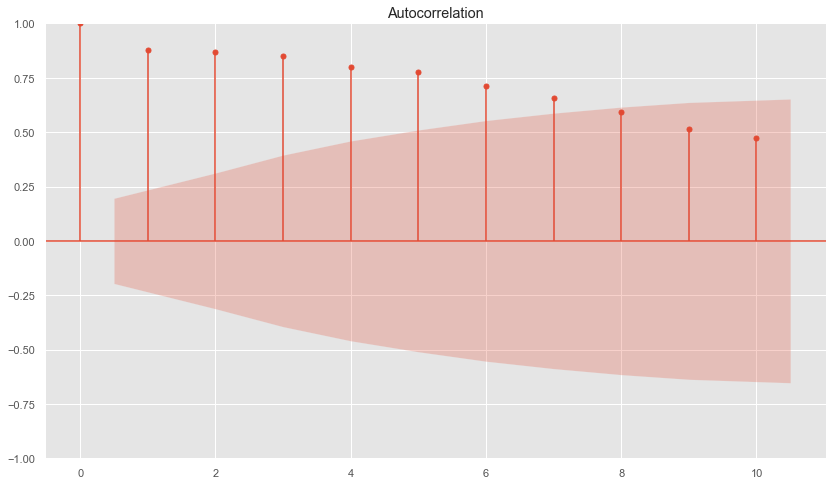

In [62]:
# plot a autocorrelation plot
fig = sm.graphics.tsa.plot_acf(df['with_noise'], lags=10)


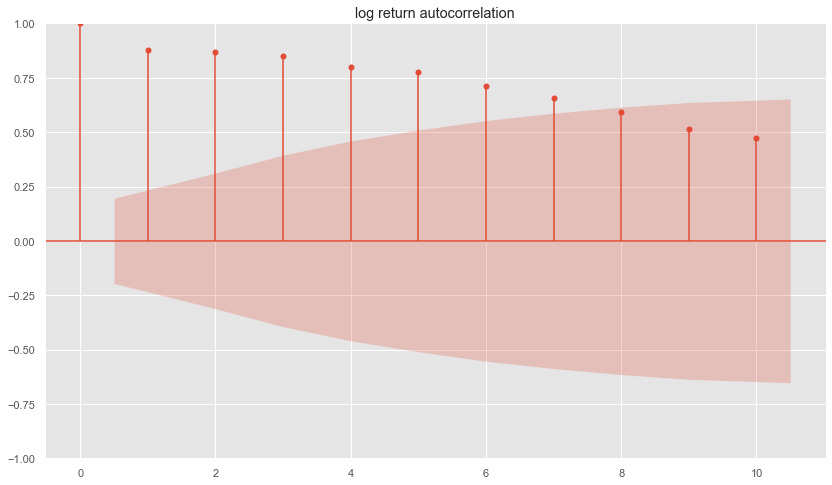

In [63]:
_ = plot_acf(df['with_noise'],lags=10, title='log return autocorrelation')

/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



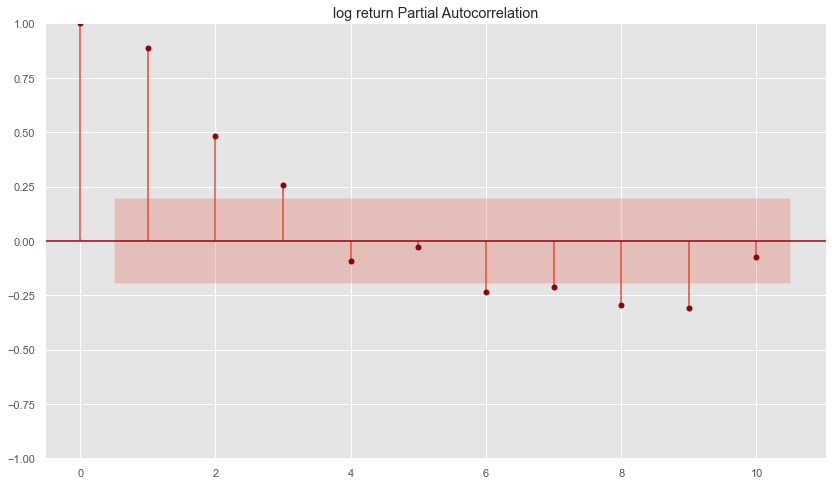

In [64]:
_ = plot_pacf(df['with_noise'], lags=10, title='log return Partial Autocorrelation', color=sns
    .xkcd_rgb["crimson"])

## ARMA model

In [65]:
# fit a ARMA model
AR_lag_p = 3
MA_lag_q = 3
model = ARIMA(df['with_noise'], order=(AR_lag_p,MA_lag_q,MA_lag_q))
arma_fit = model.fit()
arma_fit.summary()


/Users/tharshikan/Library/Caches/pypoetry/virtualenvs/quanttrading-_M_FVGhZ-py3.9/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             with_noise   No. Observations:                  100
Model:                 ARIMA(3, 3, 3)   Log Likelihood                -242.387
Date:                Thu, 21 Apr 2022   AIC                            498.774
Time:                        22:04:24   BIC                            516.797
Sample:                             0   HQIC                           506.061
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6597      0.107    -15.484      0.000      -1.870      -1.450
ar.L2         -0.9973      0.203     -4.924      0.000      -1.394      -0.600
ar.L3         -0.2931      0.125     -2.354      0.019      -0.537      -0.049
ma.L1         -0.9227      0.177     -5.217      0.000      -1.269      -0.576
ma.L2         -0.9506      0.293     -3.245      0.001      -1.525      -0.376
ma.L3          0.9504      0.172      5.524      0.000       0.613       1.288
sigma2         7.6276      1.458      5.232      0.000       4.770      10.485
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 1.58
Prob(Q):                              0.65   Prob(JB):                         0.45
Heteroskedasticity (H):               0.97   Skew:                             0.20
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
arma_pred = pd.Series(arma_fit.fittedvalues)
arma_pred


0       0.000000
1     197.517577
2      89.107777
3      92.635420
4      97.971191
         ...    
95     96.999050
96     96.815204
97     97.069014
98     96.500616
99     96.062847
Length: 100, dtype: float64

In [70]:
px.scatter(y=[df['with_noise'][:-2],arma_pred[2:]])

In [71]:
r2_score(df['with_noise'][:-2],arma_pred[2:])

0.7936922666779809